# ECS7020P mini-project submission

# 1 Author

### Student Name: Yashas Ravichandra
### Student ID : 230046616

# 2 Problem Formulation


The machine learning problem involves classifying images which contains dishes of two categories:one being rice and others containing chips. The objective is to build a model that, when given an image of a dish, it can accurately predict whether the dish consists of rice or chips.One of the major application where this model can be used is food monitoring and recommendation systems.

# 3 Machine Learning pipeline

The machine learning pipeline consists of four stages:

1)Data Preprocessing Stage

2)Model Building Stage

3)Model Training and Evaluating Stage

4)Model Loading and Conclusion stage.

#### Data Preprocessing Stage:
Input: The raw images data are selected from the training and the test
       directories.
       
Process: Using ImageDataGenerator, the images are loaded,preprocessed,and they are augmented by rescaling,shearing,zooming and          horizontal flipping.

Output: The output generates processed and transformed image data which are  used for the model training and evaluation. 

#### Model Building Stage:
Input: Processed image batches from the training set.

Process: Sequential CNN model architecture is created, consisting of convolutional layers, pooling layers, flattening,                  normalization, dropout layers and dense layers.
         dropout layers and dense layers.
         
Output: Compiled CNN model ready for training.

#### Model Training and Evaluation Stage:
Input:Training and test datasets in batches along with the defined CNN model.

Process:The compiled model is trained on the training set and evaluation is done on the testing set for a given number of               epochs.

Output: Loss and accuracy metrics are calculated after a set of epochs. The model is saved to as an HDF5 File.

#### Model Loading and Conclusion Stage:
Input:A single image is given for prediction.

Process: The saved model is loaded for inference. A random image is preprocessed, normalization is done and the image is fed            into the model for making a prediction.

Output: Prediction results indicates whether the image is classified as chips or rice based on the binary classification 
        threshold.



# 4 Transformation Stage

Input: Raw image data of dishes which are containing rice or chips. The images are different in size , color and texture.

Transformation Process: Convolutional Neural Networks are used for the feature extraction. Moreover, the layers of the CNN perform the transformation from raw image data to learned feature representations. The initial layers of the CNN learn low level features like textures and the patterns,while the inner layers of the model capture more abstract representations of the image defining to the rice and chips classes.

Output: The features that are extracted by the convolutional and pooling layers are represented by the activations. They capture required information which is essential for differentiating between rice and chips in the images

#### Reasons for feature extraction:
1)CNNs are well suited for image classification tasks because of their ability to by-default learn stratified features from any raw pixels data.

2)The CNN model architecture with multiple convolutional and pooling layers is suitable for capturing both low and high level features.

3)The extracted features will generalize well to unseen images.

#### Parameters
1)rescale: Scaling the pixel values of the images to a range between 0 and This normalization helps in standardizing the input data.

2)shear range: Introducing shearing transformations to the images. This distorts the shape of the images by shifting pixels in a fixed direction.

3)zoom range: This allows to zoom in and out by a maximum of 20 percent.

4)horizontal flip: This augmentation simulated training data and created mirror images of the originals , that results in improving the model's generalization.

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                )

In [13]:
training_set=train_datagen.flow_from_directory("D:\\DATA SCIENCE\\Machine learning\\coursework1\\Classified images\\train",
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

#Preprocessing the test set

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("D:\\DATA SCIENCE\\Machine learning\\coursework1\\Classified images\\test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 198 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


# 5 Modelling

#### Convolutional neural network
Convolutional neural network is a network architecture for deep learning which learns directly from the data. These neural networks are particularly used for finding patterns in images to recognize classes and objects.

#### Model architecture
1)The CNN has two types of model which are Sequential model and functional model. Sequential model is great if we have one data input and one data output.The other model is the Functional model which suits if there are multiple inputs and multiple outputs. So it is better for us to select a sequential model.

2)The first layer(Conv2D=used for images) is the convolutional layer with 32 filters,a kernel size of 3, relu activation and a stride of 2.

3)The second layer(MaxPool2D) acts like a condensing layer and returns the max value within that region. It reduces spatial dimensions, capturing the most important information from each feature map.

4)Another Conv2D layer with 32 filters, the same kernel size, padding, and activation function followed by another MaxPool2D layer. This helps the model learn more complex features from the input data.

5)The flattening layer converts the multi dimensional output from the convolutional layers into a 1D vector so that it can be feed into the dense layers.

6)A fully connected layer with 128 neurons and relu activation.Helps in capturing non-linear relationships in the data.

7)Batch normalization helps in normalizing the activations of the previous layer and it speeds up the training.

8)The output layer Utilizes a sigmoid activation function, producing a single output value between 0 and 1, representing the probability of the input image belonging to the positive class.

9)While compiling adam optimizer is used for efficient gradient descent and binary crossentropy for loss function which is suitable for binary classification problems.

#### Reasons for parameter choices:
1)32 filters in the convolutional layers are common starting values, capturing various features in the input images.

2)Kernel size is a standard choice for capturing local patterns.

3)Pooling with a 2x2 window and stride helps reduce spatial dimensions, retaining important features while reducing computational load.

4)128 neurons in the dense layer balance model complexity and capacity to capture higher-level features.

5)Batch normalization helps in stabilizing and accelerating the training process by normalizing layer inputs.

6)Dropout aids in preventing overfitting by introducing randomness and reducing interdependency among neurons.

7)Sigmoid activation function is suitable for binary classification tasks, providing output probabilities between 0 and 1.

In [14]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense 

In [15]:
from tensorflow.keras.regularizers import l2

In [16]:
#Creating a sequential model
cnn = tf.keras.models.Sequential()

#Adding the first convolutional model
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

#Adding the max pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Adding the second convolutional model
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Adding the flatten layer
cnn.add(tf.keras.layers.Flatten())

#Adding the full connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


cnn.add(tf.keras.layers.BatchNormalization())


cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='sigmoid'))


cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# 6 Methodology

#### Training and validation:
1.Data Preparation:

Splitting the dataset into training  and testing sets. Using the train_datagen and test_datagen for loading and preprocess the images for training and validation.

2.Model Training:
Use the fit() function to train the CNN model on the training set.Validating the model's performance on the validation set during training by specifying it in the validation_data parameter.Train the model for a specified number of epochs.

#### Performance testing:
1.Accuracy Metric: The model's accuracy is assessed using the metric given during the model compilation. It measures the proportion of correctly classified samples.

2.Loss Curve:Visualizing the training loss curves using matplotlib library. This allows monitoring the model's performance and tells us how the model is performing like if its over fitting if the train loss is decreasing and the test loss is increasing.

In [20]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data=test_set, epochs = 15)

Epoch 1/15
7/7 [==============================] - 18s 2s/step - loss: 0.2185 - accuracy: 0.9293 - val_loss: 0.8905 - val_accuracy: 0.6333
Epoch 2/15
7/7 [==============================] - 14s 2s/step - loss: 0.2143 - accuracy: 0.9040 - val_loss: 0.9409 - val_accuracy: 0.6667
Epoch 3/15
7/7 [==============================] - 14s 2s/step - loss: 0.1603 - accuracy: 0.9596 - val_loss: 0.8312 - val_accuracy: 0.7667
Epoch 4/15
7/7 [==============================] - 14s 2s/step - loss: 0.1327 - accuracy: 0.9596 - val_loss: 2.4693 - val_accuracy: 0.5333
Epoch 5/15
7/7 [==============================] - 14s 2s/step - loss: 0.2211 - accuracy: 0.9242 - val_loss: 1.7238 - val_accuracy: 0.5333
Epoch 6/15
7/7 [==============================] - 14s 2s/step - loss: 0.1497 - accuracy: 0.9394 - val_loss: 0.9397 - val_accuracy: 0.7000
Epoch 7/15
7/7 [==============================] - 14s 2s/step - loss: 0.2177 - accuracy: 0.8939 - val_loss: 0.8439 - val_accuracy: 0.6667
Epoch 8/15
7/7 [==================

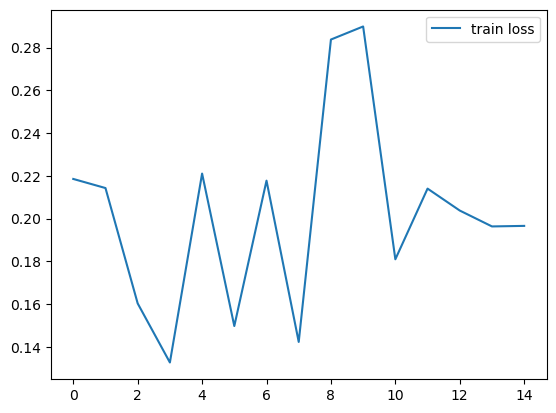

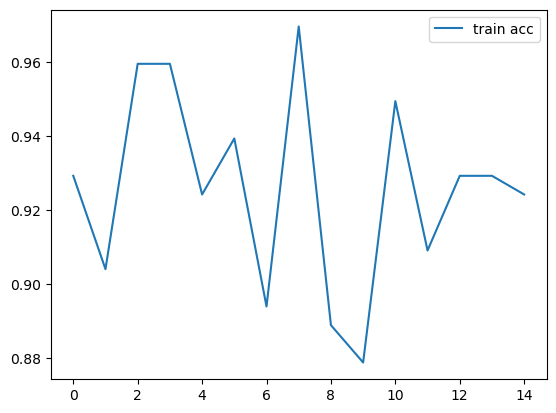

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_chips_rice.h5')

C:\Users\yasha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_chips_rice.h5')

# 7 Dataset

Training Dataset:

Chips: 93 images
Rice: 105 images

Testing Dataset:
Chips: 15 images
Rice: 15 images

This dataset will be utilized to train, validate, and assess the performance of the models developed for the classification task of distinguishing between images of dishes containing rice and those containing chips. The model's accuracy and effectiveness will be evaluated using these datasets.

CHIPS


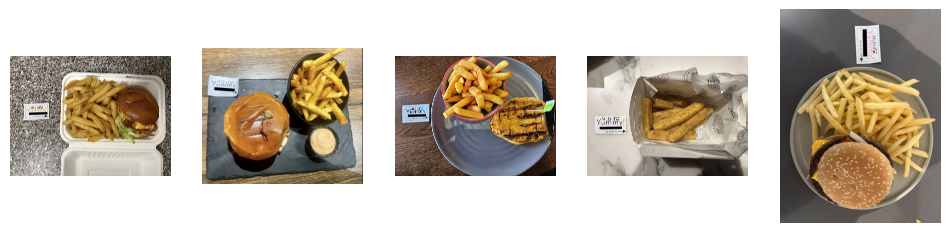

RICE


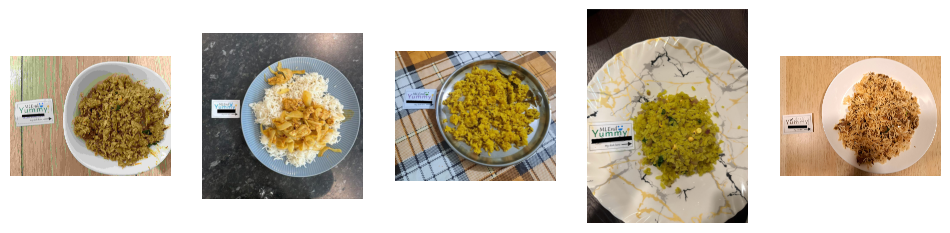

In [40]:
import matplotlib.pyplot as plt
import os
from PIL import Image

#CHIPS directory
chips_directory = "D:\\DATA SCIENCE\\Machine learning\\coursework1\\Classified images\\test\\chips"
rice_directory="D:\\DATA SCIENCE\\Machine learning\\coursework1\\Classified images\\test\\rice"

chips_images = [os.path.join(chips_directory, file) for file in os.listdir(chips_directory) if file.endswith(".jpg")]
rice_images = [os.path.join(rice_directory, file) for file in os.listdir(rice_directory) if file.endswith(".jpg")]

print('CHIPS')
# Showing the first five images of chips
number_of_images = 5
plt.figure(figsize=(12, 8))
for i in range(num_images_to_display):
    img = Image.open(chips_images[i])
    plt.subplot(1, number_of_images, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


print('RICE')
# Showing the first five images of rice
number_of_images = 5
plt.figure(figsize=(12, 8))
for i in range(num_images_to_display):
    img = Image.open(rice_images[i])
    plt.subplot(1, number_of_images, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


# 8 Results

#### Explaining the results:
1.The code loads an image from the directory path, converting it into a numpy array and normalizing the pixel values and the images are ready for the prediction and expanding its dimensions to match with the input shpae.

2)The model makes a prediction on the preprocessed image on the test data.

3). The model makes a prediction on a google downloaded picture also.

4).The result holds the model's prediction probability for the uploaded image.

#### Interpretation of results:
1.If the model's prediction probability for the given image is less than 0.5, the code determines the image as belonging to the chips class and if the probability is equal to or greater than 0.5, it categorizes the image as rice.

In [24]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("D:\\DATA SCIENCE\\Machine learning\\coursework1\\MLEndYD_images\\000021.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0]<0.5:
    print("The image classified is Chips")
else:
    print("The image classified is Rice")
    

1/1 [==============================] - 0s 126ms/step
The image classified is Rice


EVIDENCE


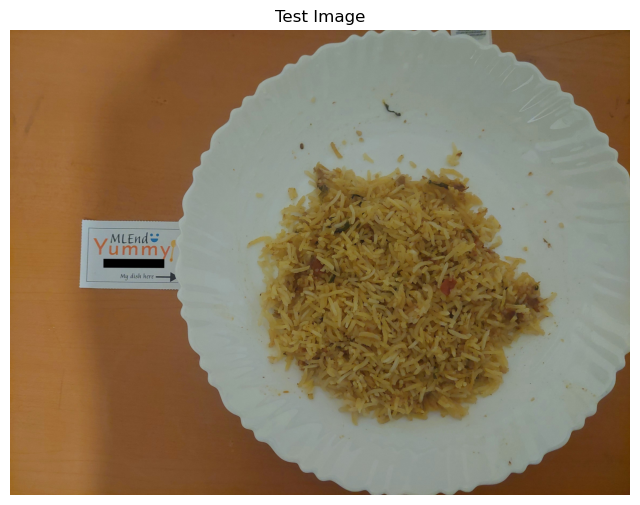

In [43]:
print('EVIDENCE')
img_path = "D:\\DATA SCIENCE\\Machine learning\\coursework1\\MLEndYD_images\\000021.jpg"
test_image = Image.open(img_path)

plt.figure(figsize=(8, 8))


plt.imshow(test_image)
plt.title('Test Image')
plt.axis('off') 
plt.show()

In [26]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("D:\\DATA SCIENCE\\Machine learning\\coursework1\\MLEndYD_images\\000024.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0]<0.5:
    print("The image classified is Chips")
else:
    print("The image classified is Rice")

1/1 [==============================] - 0s 35ms/step
The image classified is Chips


EVIDENCE


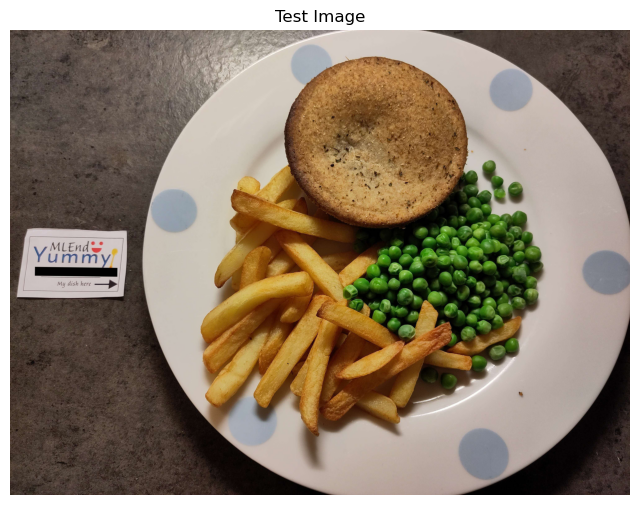

In [44]:
print('EVIDENCE')
img_path = "D:\\DATA SCIENCE\\Machine learning\\coursework1\\MLEndYD_images\\000024.jpg"
test_image = Image.open(img_path)

plt.figure(figsize=(8, 8))


plt.imshow(test_image)
plt.title('Test Image')
plt.axis('off') 
plt.show()

In [45]:
# Part 4 - Making a single prediction for a google downloaded image

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("C:\\Users\\yasha\\OneDrive\\Desktop\\potato-fry-on-white-isolated-260nw-449211763.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0]<0.5:
    print("The image classified is Chips")
else:
    print("The image classified is Rice")
    

1/1 [==============================] - 0s 17ms/step
The image classified is Chips


EVIDENCE


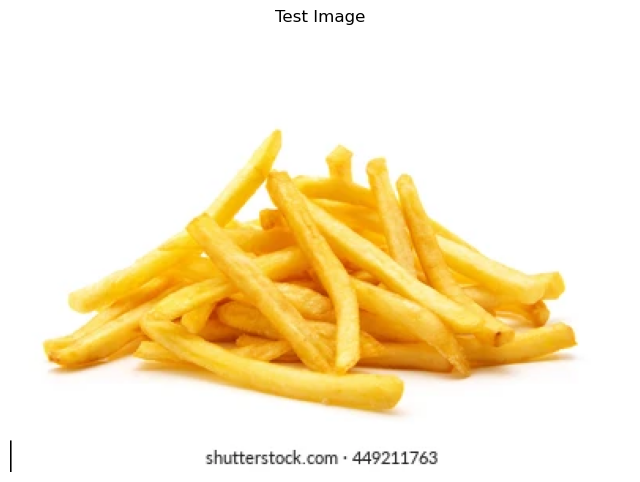

In [46]:
print('EVIDENCE')
img_path = "C:\\Users\\yasha\\OneDrive\\Desktop\\potato-fry-on-white-isolated-260nw-449211763.jpg"
test_image = Image.open(img_path)

plt.figure(figsize=(8, 8))


plt.imshow(test_image)
plt.title('Test Image')
plt.axis('off') 
plt.show()

# 9 Conclusions

#### Conclusions:

Training Accuracy (92%): The high training accuracy indicates that the model performed well on the training dataset, achieving 92 percent accuracy on the data it was trained on.
Testing Accuracy (73%): The testing accuracy of 73 percent suggests that the model's performance on unseen data  is relatively good but not as high as the training accuracy. This could indicate some level of overfitting or limitations in generalization to the unseen data.

#### Analysis:
The difference between the training and the testing accuracies might say that our model has overfit the training data. Overfitting occurs when our model learns too much about the training data but limit themselves to study unseen data.

#### Improvements:
1.Early stopping to prevent overfitting which improves generalization.

2.Applying more data augmentation techniques.

3.Experimenting with different architecture by using deeper neural networks which can result model's capacity to optimize better results.

